**Shreya Akurathi**
**200968188**
**Week 3**

# ***Train, Test and plot the performance curvesfor the following architectures over the MNIST datasets well as the CIFAR-10 dataset.***

In [9]:
#IMPORT NECCESARY LIBS
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import datasets, layers, models, losses
import sys
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras import optimizers
from tensorflow.keras.optimizers import SGD



In [3]:
# #import essential libraries
# import tensorflow as tf
# import numpy as np 
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sb
# from sklearn.metrics import confusion_matrix

# ***1. Design a CNN with:***
a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
b)One Pooling layerwhich uses MAXPOOLINGwith stride =2.
c) One hidden layer having number of neurons = 100***

# **MNIST**

In [4]:
mnist=keras.datasets.mnist

In [5]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
#Normalisation
train_images=train_images/255.0
test_images=test_images/255.0

In [7]:
train_images[0].shape

(28, 28)

In [8]:
train_images=train_images.reshape(len(train_images),28,28,1)

test_images=test_images.reshape(len(test_images),28,28,1)

In [3]:
#Build model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [10]:

model = keras.Sequential()

model.add(keras.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32,kernel_size=(5,5), activation="relu", padding = "valid"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [13]:
##Early Stopping

early_stopping = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",

    min_delta=0.01,

    patience=20,

    verbose=1,

    mode="auto",

    baseline=None,

    restore_best_weights=False,

)

In [14]:
 hist = model.fit(train_images,train_labels,batch_size = 32, callbacks= early_stopping, epochs = 100, validation_split = 0.1, verbose= 1)


Epoch 1/100
1688/1688 [==============================] - 17s 3ms/step - loss: 0.1512 - accuracy: 0.9548 - val_loss: 0.0531 - val_accuracy: 0.9865
Epoch 2/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0568 - val_accuracy: 0.9873
Epoch 3/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0408 - val_accuracy: 0.9882
Epoch 4/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0499 - val_accuracy: 0.9885
Epoch 5/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0458 - val_accuracy: 0.9888
Epoch 6/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0424 - val_accuracy: 0.9903
Epoch 7/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.0485 - val_a

Best Validation Loss: 0.0408
Best Validation Accuracy: 0.9913


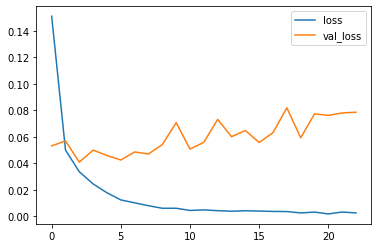

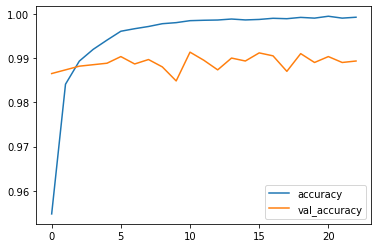

In [15]:
history1_df = pd.DataFrame(hist.history)

history1_df.loc[0:, ['loss', 'val_loss']].plot()
history1_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history1_df['val_loss'].min(), 
              history1_df['val_accuracy'].max()))

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("\n Accuracy of model:",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9876

 Accuracy of model: 0.9876000285148621


# **CIFAR10**

In [17]:
cf=keras.datasets.cifar10

In [18]:
(train_images,train_labels),(test_images,test_labels)=cf.load_data()

170508288/170498071 [==============================] - 13s 0us/step


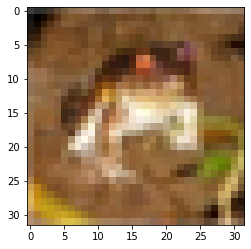

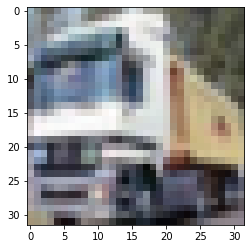

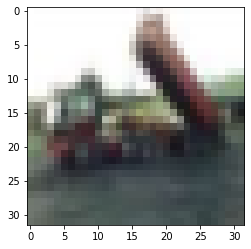

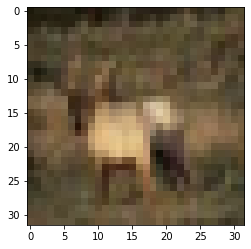

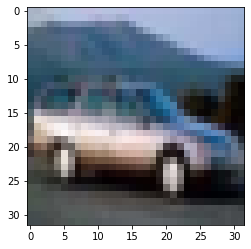

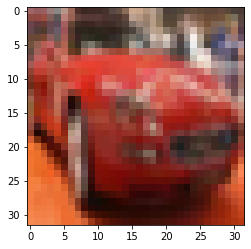

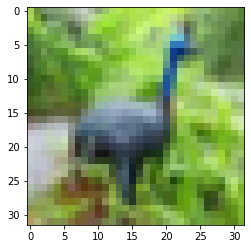

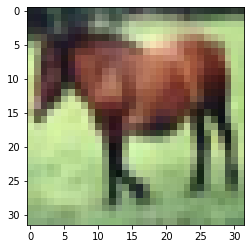

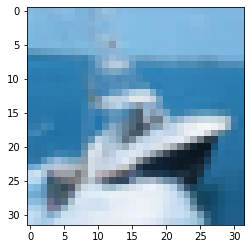

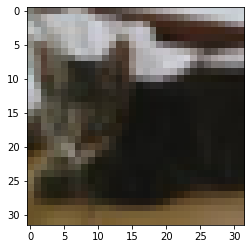

In [19]:
for i in range(10):
   plt.imshow(train_images[i],cmap="gray") 
   plt.show()

In [20]:
#Normalisation

train_images= train_images/255
test_images= test_images/255

In [21]:
train_images[0].shape

(32, 32, 3)

In [22]:
#Build model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [23]:

model1 = keras.Sequential()

model1.add(keras.Input(shape=(32,32,3)))
model1.add(keras.layers.Conv2D(32,kernel_size=(5,5), activation="relu", padding = "valid"))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [26]:
##Early Stopping

early_stopping = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",

    min_delta=0.01,

    patience=20,

    verbose=1,

    mode="auto",

    baseline=None,

    restore_best_weights=False,

)

In [27]:
hist1 = model1.fit(train_images,train_labels,batch_size = 32, callbacks= early_stopping, epochs = 100, validation_split = 0.1, verbose= 1)

Epoch 1/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5289 - accuracy: 0.4512 - val_loss: 1.2995 - val_accuracy: 0.5370
Epoch 2/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.2135 - accuracy: 0.5710 - val_loss: 1.1876 - val_accuracy: 0.5816
Epoch 3/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0866 - accuracy: 0.6211 - val_loss: 1.0961 - val_accuracy: 0.6234
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9969 - accuracy: 0.6500 - val_loss: 1.1024 - val_accuracy: 0.6230
Epoch 5/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9238 - accuracy: 0.6753 - val_loss: 1.0408 - val_accuracy: 0.6390
Epoch 6/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8693 - accuracy: 0.6961 - val_loss: 1.0408 - val_accuracy: 0.6480
Epoch 7/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8146 - accuracy: 0.7146 - val_loss: 1.0217 - val_ac

Best Validation Loss: 1.0217
Best Validation Accuracy: 0.6566


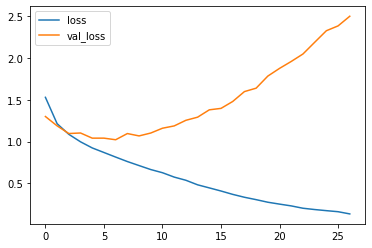

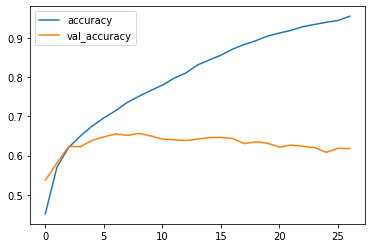

In [28]:
history2_df = pd.DataFrame(hist1.history)

history2_df.loc[0:, ['loss', 'val_loss']].plot()
history2_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history2_df['val_loss'].min(), 
              history2_df['val_accuracy'].max()))

In [29]:
test_loss, test_accuracy = model1.evaluate(test_images, test_labels)
print("\n Accuracy of model:",test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.6770 - accuracy: 0.6042

 Accuracy of model: 0.604200005531311


# ***2. Design a CNN with:a) Two back-to-backConvolution layerswhich uses 32 kernels each of size 3x3, stride = 1 and, padding =0b)One Pooling layerwhich uses MAXPOOLINGwith stride =2.c) One hidden layer having number of neurons = 100***

# **MNIST**

In [30]:
mnist=keras.datasets.mnist

In [31]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [32]:
#Normalisation
train_images=train_images/255.0
test_images=test_images/255.0

In [33]:
train_images[0].shape

(28, 28)

In [34]:
train_images=train_images.reshape(len(train_images),28,28,1)

test_images=test_images.reshape(len(test_images),28,28,1)

In [35]:
#Build model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [36]:

model2 = keras.Sequential()

model2.add(keras.Input(shape=(28,28,1)))
model2.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding = "valid"))
model2.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding = "valid"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))


In [37]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               460900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [39]:
hist2 = model2.fit(train_images,train_labels,batch_size = 32, callbacks= early_stopping, epochs = 100, validation_split = 0.1, verbose= 1)

Epoch 1/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1378 - accuracy: 0.9578 - val_loss: 0.0569 - val_accuracy: 0.9853
Epoch 2/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0480 - val_accuracy: 0.9888
Epoch 3/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0359 - val_accuracy: 0.9913
Epoch 4/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0469 - val_accuracy: 0.9873
Epoch 5/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0427 - val_accuracy: 0.9898
Epoch 6/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0507 - val_accuracy: 0.9900
Epoch 7/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0411 - val_ac

Best Validation Loss: 0.0359
Best Validation Accuracy: 0.9937


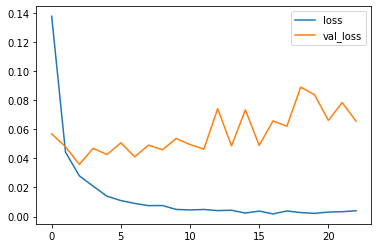

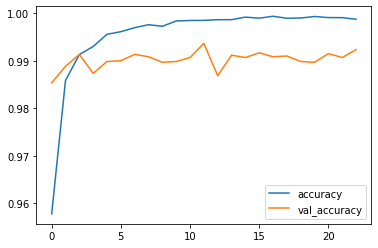

In [40]:
history3_df = pd.DataFrame(hist2.history)

history3_df.loc[0:, ['loss', 'val_loss']].plot()
history3_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history3_df['val_loss'].min(), 
              history3_df['val_accuracy'].max()))

In [41]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
print("\n Accuracy of model:",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9899

 Accuracy of model: 0.9898999929428101


#**CIFAR10**

In [42]:
cf=keras.datasets.cifar10

In [43]:
(train_images,train_labels),(test_images,test_labels)=cf.load_data()

In [44]:
#Normalisation

train_images= train_images/255
test_images= test_images/255

In [45]:
train_images[0].shape

(32, 32, 3)

In [46]:
#Build model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [47]:

model3 = keras.Sequential()

model3.add(keras.Input(shape=(32,32,3)))
model3.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding = "valid"))
model3.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding = "valid"))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(100, activation='relu'))
model3.add(keras.layers.Dense(10, activation='softmax'))

In [48]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               627300    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                      

In [50]:
hist3 = model3.fit(train_images,train_labels,batch_size = 32, callbacks= early_stopping, epochs = 100, validation_split = 0.1, verbose= 1)

Epoch 1/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3668 - accuracy: 0.5110 - val_loss: 1.0977 - val_accuracy: 0.6210
Epoch 2/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0070 - accuracy: 0.6465 - val_loss: 0.9620 - val_accuracy: 0.6684
Epoch 3/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8764 - accuracy: 0.6926 - val_loss: 0.9392 - val_accuracy: 0.6754
Epoch 4/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7724 - accuracy: 0.7294 - val_loss: 1.0080 - val_accuracy: 0.6580
Epoch 5/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6791 - accuracy: 0.7630 - val_loss: 1.0013 - val_accuracy: 0.6628
Epoch 6/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5899 - accuracy: 0.7926 - val_loss: 0.9510 - val_accuracy: 0.6948
Epoch 7/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4918 - accuracy: 0.8276 - val_loss: 1.0422 - val_ac

Best Validation Loss: 0.9392
Best Validation Accuracy: 0.6948


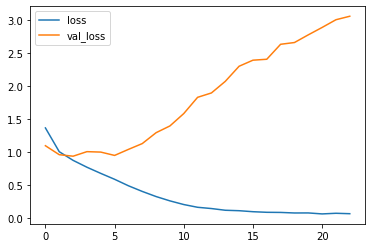

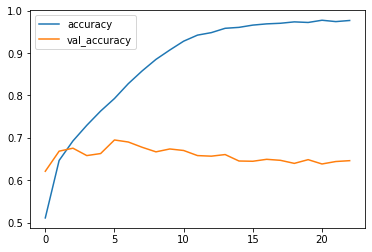

In [51]:
history4_df = pd.DataFrame(hist3.history)

history4_df.loc[0:, ['loss', 'val_loss']].plot()
history4_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history4_df['val_loss'].min(), 
              history4_df['val_accuracy'].max()))

In [52]:
test_loss, test_accuracy = model3.evaluate(test_images, test_labels)
print("\n Accuracy of model:",test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 3.1996 - accuracy: 0.6281

 Accuracy of model: 0.6280999779701233


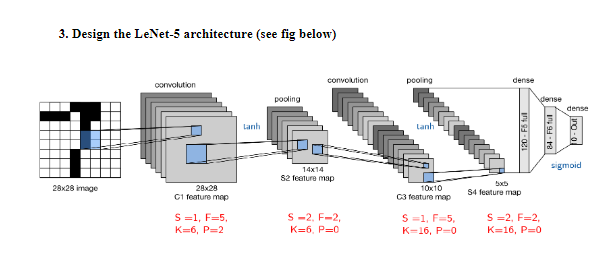

# **MNIST**

In [53]:
mnist=keras.datasets.mnist

In [54]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [55]:
#Normalisation
train_images=train_images/255.0
test_images=test_images/255.0

In [56]:
train_images[0].shape

(28, 28)

In [57]:
train_images=train_images.reshape(len(train_images),28,28,1)

test_images=test_images.reshape(len(test_images),28,28,1)

In [58]:
#Build model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [59]:

model4 = keras.Sequential()

model4.add(keras.Input(shape=(28,28,1)))
model4.add(keras.layers.Conv2D(6,kernel_size=(5,5), activation="tanh", padding = "same"))
model4.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model4.add(keras.layers.Conv2D(16,kernel_size=(5,5), activation="tanh", padding = "valid"))
model4.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(120, activation='relu'))
model4.add(keras.layers.Dense(84, activation='relu'))
model4.add(keras.layers.Dense(10, activation='sigmoid'))

In [60]:
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 120)              

In [62]:
hist4 = model4.fit(train_images,train_labels,batch_size = 32, callbacks= early_stopping, epochs = 100, validation_split = 0.1, verbose= 1)

Epoch 1/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1870 - accuracy: 0.9418 - val_loss: 0.0639 - val_accuracy: 0.9812
Epoch 2/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9813 - val_loss: 0.0668 - val_accuracy: 0.9803
Epoch 3/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0504 - val_accuracy: 0.9863
Epoch 4/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0507 - val_accuracy: 0.9835
Epoch 5/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0538 - val_accuracy: 0.9857
Epoch 6/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0527 - val_accuracy: 0.9848
Epoch 7/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0510 - val_ac

Best Validation Loss: 0.0466
Best Validation Accuracy: 0.9902


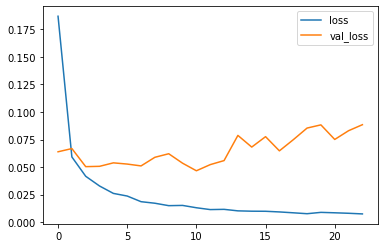

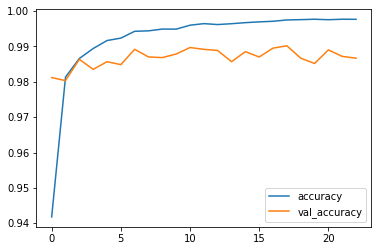

In [63]:
history5_df = pd.DataFrame(hist4.history)

history5_df.loc[0:, ['loss', 'val_loss']].plot()
history5_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history5_df['val_loss'].min(), 
              history5_df['val_accuracy'].max()))

In [64]:
test_loss, test_accuracy = model4.evaluate(test_images, test_labels)
print("\n Accuracy of model:",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9863

 Accuracy of model: 0.986299991607666


# CIFAR10

In [4]:
cf=keras.datasets.cifar10

In [5]:
(train_images,train_labels),(test_images,test_labels)=cf.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [6]:
#Normalisation

train_images= train_images/255
test_images= test_images/255

In [10]:
model5_cifar = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    layers.Conv2D(6, 5, activation='tanh', padding="same"),
    # layers.BatchNormalization(),
    layers.MaxPool2D(2, strides=2),
    layers.Conv2D(16, 5, activation='tanh'),
    # layers.BatchNormalization(),
    layers.MaxPool2D(2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='sigmoid'),
    layers.Dense(84, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])



In [11]:
model5_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
hist5 = model5_cifar.fit(train_images,train_labels,batch_size = 128, callbacks= early_stopping, epochs = 100, validation_split = 0.1, verbose= 1)

Epoch 1/100
352/352 [==============================] - 13s 6ms/step - loss: 1.8537 - accuracy: 0.3253 - val_loss: 1.5999 - val_accuracy: 0.4272
Epoch 2/100
352/352 [==============================] - 2s 4ms/step - loss: 1.5385 - accuracy: 0.4426 - val_loss: 1.4400 - val_accuracy: 0.4820
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 1.4236 - accuracy: 0.4859 - val_loss: 1.3621 - val_accuracy: 0.5140
Epoch 4/100
352/352 [==============================] - 2s 4ms/step - loss: 1.3327 - accuracy: 0.5184 - val_loss: 1.2916 - val_accuracy: 0.5382
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 1.2672 - accuracy: 0.5455 - val_loss: 1.2477 - val_accuracy: 0.5564
Epoch 6/100
352/352 [==============================] - 2s 7ms/step - loss: 1.2020 - accuracy: 0.5682 - val_loss: 1.1912 - val_accuracy: 0.5718
Epoch 7/100
352/352 [==============================] - 2s 5ms/step - loss: 1.1489 - accuracy: 0.5880 - val_loss: 1.1578 - val_accuracy: 0.585

In [15]:
model5_cifar.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

Best Validation Loss: 1.0067
Best Validation Accuracy: 0.6510


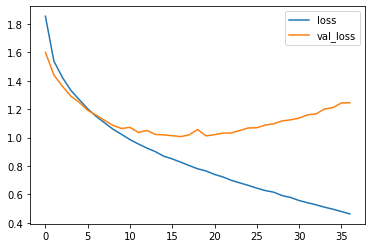

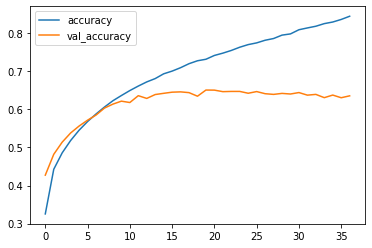

In [16]:
history6_df = pd.DataFrame(hist5.history)

history6_df.loc[0:, ['loss', 'val_loss']].plot()
history6_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history6_df['val_loss'].min(), 
              history6_df['val_accuracy'].max()))

In [17]:
test_loss, test_accuracy = model5_cifar.evaluate(test_images, test_labels)
print("\n Accuracy of model:",test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.3413 - accuracy: 0.6095

 Accuracy of model: 0.609499990940094


# ***After tuning hyperparameters and architecture***

**MNIST**

In [18]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	return model

In [20]:
mnist=keras.datasets.mnist

In [22]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [23]:
#Normalisation
train_images=train_images/255.0
test_images=test_images/255.0


Epoch 1/200
797/797 [==============================] - 8s 8ms/step - loss: 1.4921 - accuracy: 0.4735 - val_loss: 0.2135 - val_accuracy: 0.9443
Epoch 2/200
797/797 [==============================] - 6s 7ms/step - loss: 0.3941 - accuracy: 0.8770 - val_loss: 0.1041 - val_accuracy: 0.9696
Epoch 3/200
797/797 [==============================] - 6s 8ms/step - loss: 0.2604 - accuracy: 0.9211 - val_loss: 0.0839 - val_accuracy: 0.9747
Epoch 4/200
797/797 [==============================] - 7s 8ms/step - loss: 0.2047 - accuracy: 0.9373 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 5/200
797/797 [==============================] - 7s 9ms/step - loss: 0.1776 - accuracy: 0.9478 - val_loss: 0.0604 - val_accuracy: 0.9820
Epoch 6/200
797/797 [==============================] - 7s 9ms/step - loss: 0.1559 - accuracy: 0.9545 - val_loss: 0.0603 - val_accuracy: 0.9823
Epoch 7/200
797/797 [==============================] - 6s 7ms/step - loss: 0.1365 - accuracy: 0.9593 - val_loss: 0.0529 - val_accuracy: 0.9851

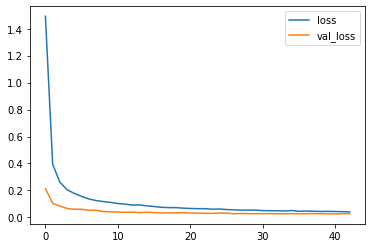

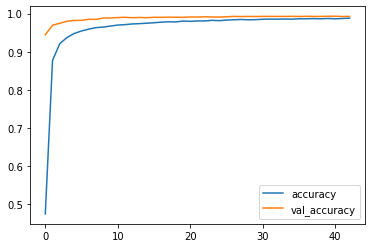

In [24]:
modelfinal=define_model()
historyfinal = modelfinal.fit(train_images, train_labels, epochs=200, batch_size=64, validation_split=0.15,callbacks=[early_stopping])
history_final = pd.DataFrame(historyfinal.history)
history_final.loc[0:, ['loss', 'val_loss']].plot()
history_final.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_final['val_loss'].min(), 
              history_final['val_accuracy'].max()))

In [25]:
test_lossfinal, test = modelfinal.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy of MNIST :', test)

313/313 - 1s - loss: 0.0163 - accuracy: 0.9948 - 1s/epoch - 3ms/step

Test accuracy of MNIST : 0.9947999715805054


**CIFAR**

In [26]:
cf=keras.datasets.cifar10

In [26]:
(train_images,train_labels),(test_images,test_labels)=cf.load_data()

In [27]:
#Normalisation

train_images= train_images/255
test_images= test_images/255

In [29]:
model=define_model()
history = model.fit(train_images, train_labels, epochs=200, batch_size=64, validation_split=0.15,callbacks=[early_stopping])

Epoch 1/200
797/797 [==============================] - 7s 8ms/step - loss: 2.3018 - accuracy: 0.1095 - val_loss: 2.3016 - val_accuracy: 0.1063
Epoch 2/200
797/797 [==============================] - 6s 7ms/step - loss: 2.3012 - accuracy: 0.1136 - val_loss: 2.3015 - val_accuracy: 0.1063
Epoch 3/200
797/797 [==============================] - 6s 7ms/step - loss: 2.3008 - accuracy: 0.1145 - val_loss: 2.3013 - val_accuracy: 0.1063
Epoch 4/200
797/797 [==============================] - 6s 8ms/step - loss: 2.3002 - accuracy: 0.1144 - val_loss: 2.3000 - val_accuracy: 0.1063
Epoch 5/200
797/797 [==============================] - 6s 7ms/step - loss: 2.2975 - accuracy: 0.1216 - val_loss: 2.2968 - val_accuracy: 0.1063
Epoch 6/200
797/797 [==============================] - 6s 7ms/step - loss: 2.2947 - accuracy: 0.1278 - val_loss: 2.2876 - val_accuracy: 0.2239
Epoch 7/200
797/797 [==============================] - 6s 7ms/step - loss: 2.2906 - accuracy: 0.1367 - val_loss: 2.3034 - val_accuracy: 0.1063

Best Validation Loss: 2.1458
Best Validation Accuracy: 0.4453


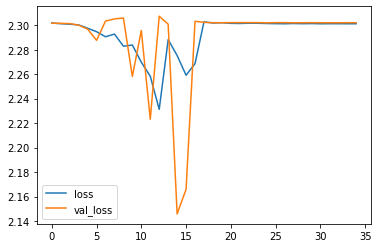

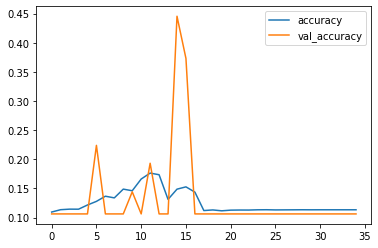

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy of CIFAR with Changed Architecture and Hyperparameters:', test_acc)

313/313 - 1s - loss: 2.3010 - accuracy: 0.1135 - 826ms/epoch - 3ms/step

Test accuracy of CIFAR with Changed Architecture and Hyperparameters: 0.11349999904632568


***Comparision***